In [1]:
# Mount drive
import os
from google.colab import drive
%cd /content
drive.mount('/content/drive', force_remount=True)
%cd 'drive/My Drive/Colab Notebooks/NLP/project/code'
%ls -l
print(os.listdir())

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/NLP/project/code
total 1001
-rw------- 1 root root   3534 Apr 22 16:32 cleaning.py
drwx------ 2 root root   4096 May  3 09:43 __pycache__/
-rw------- 1 root root  21800 Apr 25 09:06 pytorch_tuto.ipynb
-rw------- 1 root root 808814 May  4 08:33 Untitled0.ipynb
-rw------- 1 root root  22808 Apr 22 16:46 Untitled.ipynb
-rw------- 1 root root   3545 Apr 22 16:32 utils_cleaning.py
-rw------- 1 root root  20191 Apr 27

In [2]:
import pandas as pd
import numpy as np
import random
import re
import time
from string import punctuation
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.tokenize import word_tokenize

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors, TfidfModel
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

import utils_cleaning

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
from nltk.corpus import stopwords

In [4]:
train_data = pd.read_csv("../data/train.csv")
nrows = len(train_data)
# train_data = train_data.dropna()
print('{} rows removed'.format(nrows-len(train_data)))

questions1 = train_data['question1'].apply(str).values.tolist()
questions2 = train_data['question2'].apply(str).values.tolist()

label = train_data['is_duplicate'].values

0 rows removed


In [0]:
train_qs = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)

In [110]:
train_qs

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
808575    How many keywords are there in PERL Programmin...
808576           Is it true that there is life after death?
808577                                    What's this coin?
808578    I am having little hairfall problem but I want...
808579        What is it like to have sex with your cousin?
Length: 808580, dtype: object

In [133]:
cv = CountVectorizer(encoding='unicode', stop_words = stopwords.words('english'), tokenizer=lambda x: x.split(' ')).fit(train_qs)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [114]:
counts = cv.transform(train_qs.tolist()).sum(axis=0)
print(counts.shape)
names = cv.get_feature_names()
freq = {names[i]:counts[0,i] for i in range(len(names))}

(1, 86010)


In [127]:
train_qs

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
808575    How many keywords are there in PERL Programmin...
808576           Is it true that there is life after death?
808577                                    What's this coin?
808578    I am having little hairfall problem but I want...
808579        What is it like to have sex with your cousin?
Length: 808580, dtype: object

In [115]:
sorted(freq.items(), key=lambda x: x[1])[:10]

[('0000', 1),
 ('000000', 1),
 ('00000000', 1),
 ('0000001', 1),
 ('00000074', 1),
 ('0000021210', 1),
 ('00001', 1),
 ('0001', 1),
 ('0002', 1),
 ('000ft', 1)]

In [0]:
words = (" ".join(train_qs)).lower().split()

In [0]:
all_questions = pd.concat((train_data['question1'], train_data['question2']))
all_questions = all_questions.drop_duplicates().apply(str).values.tolist()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer(strip_accents='unicode', analyzer='word', stop_words=stopwords.words('english'), min_df=2)
countvectorizer = CountVectorizer(strip_accents='unicode', analyzer='word', stop_words=stopwords.words('english'), min_df=2)

In [137]:
countvectorizer = CountVectorizer(encoding='unicode', stop_words = stopwords.words('english'), tokenizer=lambda x: x.split(' '), min_df=2).fit(train_qs)
tfidf = TfidfVectorizer(encoding='unicode', stop_words = stopwords.words('english'), tokenizer=lambda x: x.split(' '), min_df=2).fit(train_qs)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [95]:
# countvectorizer.fit(all_questions)
counts = countvectorizer.transform(all_questions).sum(axis=0)
print(counts.shape)
names = countvectorizer.get_feature_names()
freq = {names[i]:counts[0,i] for i in range(len(names))}

(1, 47129)


In [0]:
counts = countvectorizer.transform(questions1 + questions2)
questions1_features_bis2 = counts[:len(questions1)]
questions2_features_bis2 = counts[-len(questions2):]

In [107]:
sorted(freq.items(), key=lambda x: x[1])[-10:]

[('way', 10271),
 ('make', 11437),
 ('one', 13793),
 ('would', 16389),
 ('people', 16398),
 ('good', 17685),
 ('india', 18334),
 ('like', 19050),
 ('get', 25827),
 ('best', 40992)]

In [139]:
# tfidf.fit(all_questions)
vectors = tfidf.transform(questions1 + questions2)
print(vectors.shape)

(808580, 98238)


In [0]:
import scipy.sparse.linalg
U, _, _ = scipy.sparse.linalg.svds(vectors, k=100, return_singular_vectors='u')

In [34]:
U.shape

(808580, 100)

In [0]:
questions1_features = U[:len(questions1)]
questions2_features = U[-len(questions2):]

In [57]:
questions1_features.shape

(404290, 100)

In [140]:
questions1_features_bis = vectors[:len(questions1)]
questions2_features_bis = vectors[-len(questions2):]

print(questions1_features_bis.shape)
print(questions2_features_bis.shape)

(404290, 98238)
(404290, 98238)


In [141]:
features_bis1 = (questions1_features_bis.multiply(questions2_features_bis != 0) + questions2_features_bis.multiply(questions1_features_bis != 0)).sum(axis=1)
features_bis1 = features_bis1 / (questions1_features_bis.sum(axis=1) + questions2_features_bis.sum(axis=1) + 1e-12)

features_bis2 = (questions1_features_bis2.multiply(questions2_features_bis2 != 0) + questions2_features_bis2.multiply(questions1_features_bis2 != 0)).sum(axis=1)
features_bis2 = features_bis2 / (questions1_features_bis2.sum(axis=1) + questions2_features_bis2.sum(axis=1) + 1e-12)

features_bis = np.concatenate((features_bis1, features_bis2), axis=1)
features_bis.shape

(404290, 2)

In [36]:
len(questions1_features) + len(questions2_features)

808580

In [37]:
print(len(questions1))
print(len(questions1_features))

print(len(questions2))
print(len(questions2_features))

404290
404290
404290
404290


In [38]:
# features = np.concatenate((questions1_features, questions2_features), axis=1)
features = np.abs(questions1_features - questions2_features)
features.shape

(404290, 100)

In [142]:
from sklearn.model_selection import train_test_split
train_features, valid_features, train_labels, valid_labels = train_test_split(features_bis, label, train_size=0.9, random_state=42)

print(train_labels.sum()/len(train_labels))
print(valid_labels.sum()/len(valid_labels))

0.36918218770354616
0.3693388409310149


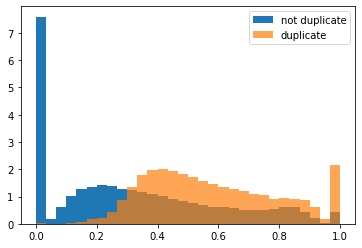

In [143]:
plt.hist(train_features[train_labels==0,0], bins=30, density=True, label='not duplicate')
plt.hist(train_features[train_labels==1,0], bins=30, density=True, label='duplicate', alpha=0.7)
plt.legend()
plt.show()

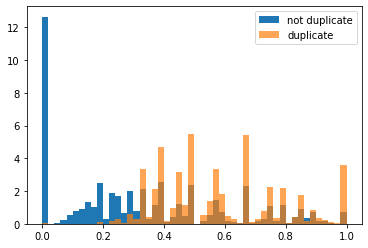

In [144]:
plt.hist(train_features[train_labels==0,-1], bins=50, density=True, label='not duplicate')
plt.hist(train_features[train_labels==1,-1], bins=50, density=True, label='duplicate', alpha=0.7)
plt.legend()
plt.show()

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

model = LogisticRegression()
model.fit(train_features, train_labels)

train_predictions = model.predict_proba(train_features)
valid_predictions = model.predict_proba(valid_features)

train_loss = log_loss(train_labels, train_predictions)
valid_loss = log_loss(valid_labels, valid_predictions)

print(train_loss)
print(valid_loss)

0.5518041259971992
0.5508092241137406


In [146]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(train_features, label=train_labels)
d_valid = xgb.DMatrix(valid_features, label=valid_labels)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.686194	valid-logloss:0.686427
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.63131	valid-logloss:0.631538
[20]	train-logloss:0.592856	valid-logloss:0.592684
[30]	train-logloss:0.563929	valid-logloss:0.56413
[40]	train-logloss:0.542817	valid-logloss:0.542874
[50]	train-logloss:0.526412	valid-logloss:0.526677
[60]	train-logloss:0.51399	valid-logloss:0.514258
[70]	train-logloss:0.504153	valid-logloss:0.504477
[80]	train-logloss:0.496462	valid-logloss:0.496776
[90]	train-logloss:0.490682	valid-logloss:0.490911
[100]	train-logloss:0.485905	valid-logloss:0.48627
[110]	train-logloss:0.482196	valid-logloss:0.482528
[120]	train-logloss:0.479147	valid-logloss:0.479573
[130]	train-logloss:0.476812	valid-logloss:0.477224
[140]	train-logloss:0.474756	valid-logloss:0.475313
[150]	train-logloss:0.473309	valid-logloss:0.473765
[160]	train-logloss:0.471967	val

In [92]:
log_loss(train_labels, train_labels.mean()*np.ones(len(train_labels)))

0.6585189921775046

In [0]:
def clean_questions(questions):
  cleaned = []
  for question in questions:
    cleaned.append(utils_cleaning.text_to_wordlist(question, remove_stop_words=True, lemmatize=True,stem_words=True))
  return cleaned

In [69]:
features.std(axis=0)

array([0.00097622, 0.00076715, 0.00079522, 0.00075855, 0.00086897,
       0.00062131, 0.00082569, 0.00079371, 0.00089572, 0.00081196,
       0.00049073, 0.00086907, 0.00073165, 0.0007446 , 0.00075494,
       0.00091296, 0.00083582, 0.00085579, 0.00084603, 0.00094272,
       0.00091418, 0.00094152, 0.00087562, 0.00084311, 0.0008813 ,
       0.00083593, 0.00088129, 0.00025181, 0.00086761, 0.00087232,
       0.00081722, 0.00088373, 0.00079094, 0.00076286, 0.00082644,
       0.00086282, 0.00087254, 0.00087173, 0.0008235 , 0.00083544,
       0.00083611, 0.00081607, 0.00091296, 0.00088834, 0.00095471,
       0.00097184, 0.00089261, 0.0007674 , 0.00085632, 0.00076438,
       0.00081963, 0.00090985, 0.00079726, 0.00079514, 0.00077297,
       0.00077687, 0.00081153, 0.00086383, 0.00070555, 0.00077956,
       0.00092739, 0.00082434, 0.00084063, 0.00077246, 0.0007689 ,
       0.00079895, 0.00090339, 0.00085499, 0.00091229, 0.00099201,
       0.00078111, 0.00088263, 0.00095587, 0.00095235, 0.00076

In [0]:
train_question1 = clean_questions(questions1)
train_question2 = clean_questions(questions2)

In [0]:
train_question1 = [q.split() for q in train_question1]
train_question2 = [q.split() for q in train_question2]

In [0]:
def get_token_count(texts):
  from collections import defaultdict
  frequency = defaultdict(int)
  for text in texts:
      for token in text:
          frequency[token] += 1
  return frequency

def keep_frequent_tokens(questions1, questions2, frequency, freq=1):
  # Only keep words that appear more than once
  questions1 = [[token for token in text if frequency[token] > freq] for text in questions1]
  questions2 = [[token for token in text if frequency[token] > freq] for text in questions2]
  return questions1, questions2

In [0]:
frequency = get_token_count(train_question1 + train_question2)

In [0]:
train_question1, train_question2 = keep_frequent_tokens(train_question1, train_question2, frequency, freq=1)

In [12]:
from gensim import corpora

dictionary = corpora.Dictionary(train_question1 + train_question2)
print(dictionary)

Dictionary(38155 unique tokens: ['guid', 'india', 'invest', 'market', 'share']...)


In [0]:
question1_features = [dictionary.doc2bow(text) for text in train_question1]
question2_features = [dictionary.doc2bow(text) for text in train_question2]

In [22]:
question1_features[:2]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1)],
 [(6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]]

In [0]:
tfidf = TfidfModel(question1_features + question2_features)

In [0]:
from gensim import matutils
def densify(tfidf, dictionary, bow):
    tfidf_corpus = []
    for doc in bow:
        tfidf_corpus.append(tfidf[doc])

    tfidf_mat = matutils.corpus2dense(tfidf_corpus, num_terms=len(dictionary.token2id))
    return tfidf_mat

In [0]:
vectors1 = densify(tfidf, dictionary, question1_features)
# vectors2 = densify(tfidf, question2_features)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:502: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)


In [0]:
vectors.shape

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
model2 = TfidfVectorizer()

In [0]:
from sklearn.model_selection import train_test_split
d_train_index, d_valid_index = train_test_split(np.arange(len(question1_features)), train_size = 0.9)
d_train, d_valid = 

In [0]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)